# Results.ipynb

Investigate results from the runTests notebook

To run this, first open `runTests.ipynb` and execute all the cells, it will store the results in global space.  Then, run the below to pull them here.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
with open(f"results_400000.pkl", "rb") as file:
    results_400 = pkl.load(file)

with open(f"results_1500000.pkl", "rb") as file:
    results_1500 = pkl.load(file)

In [3]:
pdResults = pd.DataFrame.from_dict(results_400.values())
pd1500Results = pd.DataFrame.from_dict(results_1500.values())
pdResults["400k Time (s)"] = pdResults["Time (s) - Avg"].astype(float)
pdResults["1500k Time (s)"] = pd1500Results["Time (s) - Avg"].astype(float)
pdResults[["Test", "Category", "Description", "400k Time (s)", "1500k Time (s)"]]

,Test,Category,Description,400k Time (s),1500k Time (s)
0,Test 1,Cluster Add,"One-Column, integer, Clustered Index Create",7.97,51.65
1,Test 2,Cluster Drop,"One-Column, integer, Clustered Index Delete",0.09,0.30
2,Test 3,Cluster Add,"One-Column, integer, Clustered Index Create - ...",14.78,95.64
3,Test 4,Cluster Drop,"One-Column, integer, Clustered Index Delete - ...",0.12,1.27
4,Test 5,Cluster Add,"Two-Column, Clustered Index Create",8.16,49.15
5,Test 6,Cluster Drop,"Two-Column, Clustered Index Delete",0.10,0.31
6,Test 7,Cluster Add,"Two-Column, Clustered Index Create - Extra Rec...",16.26,79.97
7,Test 8,Cluster Drop,"Two-Column, Clustered Index Delete - Extra Rec...",0.14,0.55
8,Test 9,Non-Cluster Add,"Single-Column, Non-Clustered Index Create",1.99,12.05
9,Test 10,Non-Cluster Delete,"Single-Column, Non-Clustered Index Delete",0.04,0.11


In [4]:
pdGraphData = pdResults[["Test", "Category", "Time (s) - Avg"]].copy(deep=True)
pdGraphData["Sample"] = "400k"
pd1500Results["Sample"] = "1500k"
pdGraphData = pd.concat([pdGraphData, pd1500Results[["Test", "Category", "Sample", "Time (s) - Avg"]].copy(deep=True)])
pdGraphData["Time (s) - Avg"] = pdGraphData["Time (s) - Avg"].astype(float)
pdGraphData.reset_index(drop=True, inplace=True)

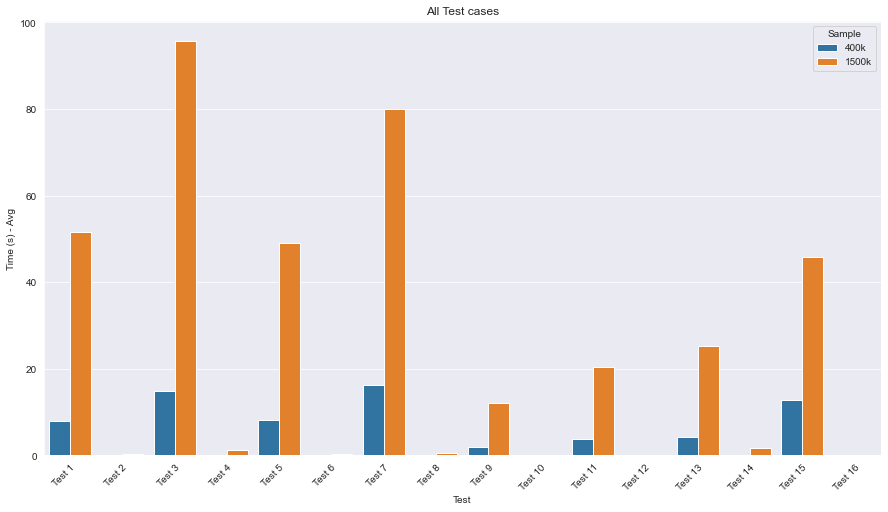

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=pdGraphData, x="Test", y="Time (s) - Avg", hue="Sample", ax=ax).set(title='All Test cases')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.show()

/var/folders/d7/4cl_f7wd7y5_c9gcsjbt78y80000gn/T/ipykernel_82501/3253239467.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


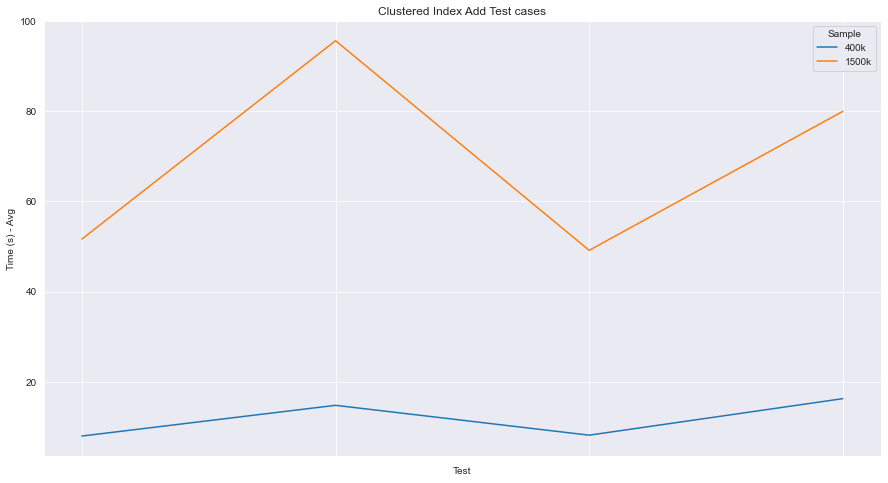

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=pdGraphData[pdGraphData["Category"] == "Cluster Add"], x="Test", y="Time (s) - Avg", hue="Sample", ax=ax).set(title='Clustered Index Add Test cases')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [7]:
nonClusteredTests = pdGraphData[pdGraphData["Category"].str.contains("Non-Cluster Add")]

/var/folders/d7/4cl_f7wd7y5_c9gcsjbt78y80000gn/T/ipykernel_82501/476470634.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


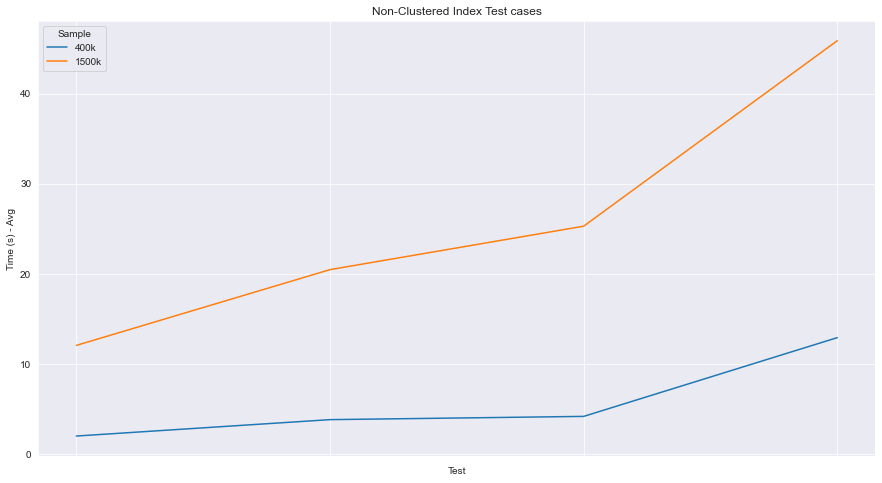

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=nonClusteredTests, x="Test", y="Time (s) - Avg", hue="Sample", ax=ax).set(title='Non-Clustered Index Test cases')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()